# Interpolation und Approximation

Ziel dieses Kapitel ist es die $n+1$ Datenpunkte $(x_0,y_0)...(x_n,y_n)$ zu betrachten und die Funktion $p(x)$ mit $p(x_i) = y_i$ für $i = 0,...n$ zu finden

## Newtons Polynomial Interpolation

Die generelle Form des Interpolationspolynoms ist:

$f(x) = a_0 + a_1(x-x_0) + ... + a_n(x-x_0)(x-x_1)...(x-x_n)$


Dazu verwenden wir zunächst die dividerenden Differenzen diese sind durch folgende Vorschrift gegeben

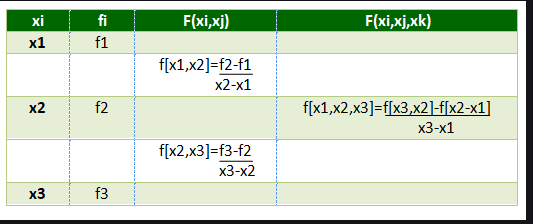


Insbesondere gilt für das Polynom dann

$p(x)  = y_0 + (x-x_0)\delta y_0 + (x-x_0)(x-x_1)\delta^2 y_0 + ... + (x-x_0)(x-x_{n-1})\delta^n y_0$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x,y):
    """ 
    a function to calculate the divided differences table for datapoints (x,y)
    """
    n = len(y)
    coef = np.zeros([n,n])
    coef[:,0] = y 
    for j in range(1,n): # loop starts at 1
        for i in range (n-j):
            coef[i][j] = (coef[i+1][j-1]- coef[i][j-1])/(x[i+j]-x[i])
    return coef

# In this implementation the top row has our divided differences

x = np.array([-5,-1,0,2])
y = np.array([-2,6,1,3])

coef_table = divided_diff(x,y)
print(coef_table)

[[-2.          2.         -1.4         0.48571429]
 [ 6.         -5.          2.          0.        ]
 [ 1.          1.          0.          0.        ]
 [ 3.          0.          0.          0.        ]]


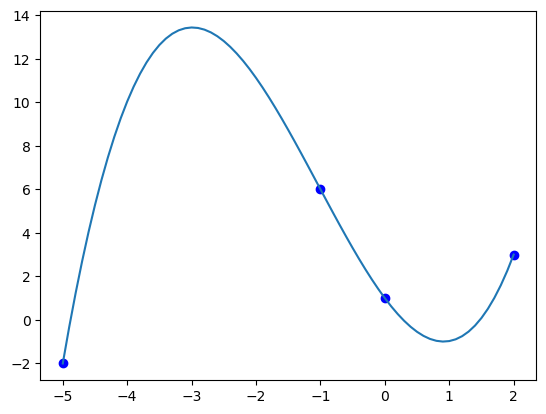

In [5]:
def newton_poly(coef,x_data,x):
    """ 
    evaluate polynomial at x
    """
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x-x_data[n-k])*p
    return p

a_s = divided_diff(x,y)[0,:]

x_new = np.arange(-5,2.1,.1)
y_new = newton_poly(a_s,x,x_new)

plt.plot(x,y,"bo")
plt.plot(x_new,y_new)
plt.show()


## Auswertung des Polynoms mittels Horner Schema

Gegeben ist ein Polynom $c_nx^n + c_{n-1}x^{n-1} ... + c_1 x + c_0$ es geht nun um das finden des Wertes am Punkt $x$

+ Naiver Weg für diese Auswertung wäre Term für Term durchzugehen, damit hättem an $O(n^2)$ time complexity
+ Durch das Hornerschema braucht man nur l Multiplikationen hat also $O(n)$ time complexity

Ein simples Beispiel nehme $2x^3 -6x^2 + 2x -1$ Dann gilt $((2x-6)x+2)x-1$

In [6]:
def horner(poly,n,x):
    """ 
    Returns poly[0]x(n-1)+poly[1]x(n-2)+ ... poly[n-1] 
    """


    # Result
    result = poly[0]

    for i in range(1,n):
        result = result * x + poly[i]

    return result

poly = [2,-6,2,-1] # polynomial 2x3 - 6x2 + 2x - 1
x = 3
n = len(poly)

print("Value of Polynomial is ", horner(poly,n,x))


Value of Polynomial is  5


# Trigonometrsiche Interpolation und diskrete Fourier Transformation

Ziel: Berechnung eines Spektrums aus einem zusammengesetzten periodischen Signal


### Facts zu Fourier Reihen:

Man betrachtet $f[0,2\pi]\to \mathbb{R}$ eine quadratisch integrierbarte Funktion $\int_{0}^{2\pi}|f(x)|^2 dx < \infty$. Bezeichnung $f\in L^2(0,2\pi)$

+ Definiere Norm $||f|| = (\frac{1}{2\pi}\int_{0}^{2\pi}|f(x)|^2dx)^{1/2}$
+ Nach Cauchy Schwarz exestiert Fourier Koeffizient $\hat{f}(k)= \frac{1}{2\pi}\int_0^{2\pi}f(x)e^{-ikx}dx$
+ Man definiert das trigonometrische Polynom als $p_K(x)$ mit $p_K(x):= \sum_{k=-K}^{K}\hat{f}(k)^{ikx}$

### Frage nach der Konvergenz

Man hat normalerweise Konvergenz von $p_k \to f$ im quadratischen Mittel:

$\lim_{K\to \infty}||f - p_K|| = 0 \Leftrightarrow \lim_{K\to\infty} \int_0^{2\pi}|f(x)-p_K(x)|^2 dx = 0$

#### Theorem 3.30 (Heuser, Analysis II)

Sei $f \in L^2(0,2\pi)$ stückweise stetig differenzierbar. Dann gilt für $K \to infty$

$p_K(x) \to \frac{1}{2}\lim_{h\to 0^+}(f(x + h) + f(x-h))$ 

Damit konvergieren die Fourier Polynome in diesem Fall sogar gegen den Mittelwert der Funktion

### Diskrete Fourier Transformation

Sei $P_N = \{ (y_k)_{k\in Z}| y_k \in \mathbb{C} ~ y_{k+N} = y_k \}$ die Menge der N-Periodischen Folgen

Dann definiert man für ein $y \in P_N$ eine neue Folge $(z_k) \in P_N$ mit 

$z_k = \frac{1}{N}\sum_{l=0}^{N-1} y_l e^{-ik x_l} = \frac{1}{N} \sum_{l=0}^{N-1}y_l \omega^{-kl}$

mit $\omega = e^{2\pi i /N}$ und einer äquidistanten Unterteilung von $[0,2\pi]$ durch $x_l = \frac{2\pi l}{N}$


Im Grunde genommen erreicht man so eine Approximation von $\hat{f}(k) = \frac{1}{2\pi}\int_0^{2\pi}f(x)^{-ikx}dx$


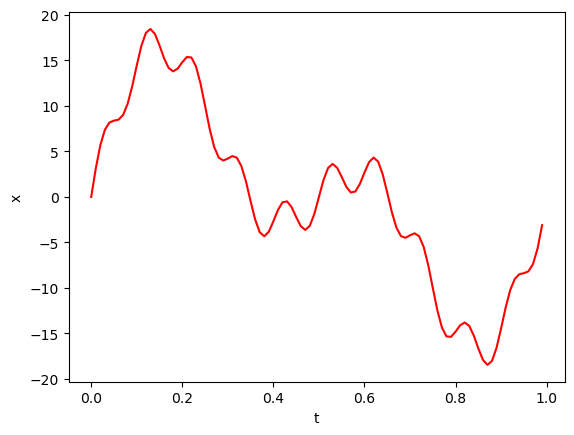

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Basically make the time values by considering the rate at which the continious signal is sampled
rate = 100
interval = 1/rate

t_start = 0
t_end = 1
t = np.arange(t_start, t_end, interval)


# Lets now make a combined sine signal as a test for our Fourier Transformation

def getSineSignal(amps,freqs,t):
    """
    Makes a combined sine signal

    Attr:
        amps = amplitudes
        freqs = frequencies
        t = time
    """
    x = np.zeros_like(t)
    for a, f in zip(amps,freqs):
        x += a * np.sin(2 * np.pi * f * t)
    return x

amps = np.array([9,10,2.3])
freqs = np.array([2,1,10])
x = getSineSignal(amps, freqs,t)
plt.Figure(figsize=(8,6))
plt.plot(t,x,"r")
plt.xlabel("t")
plt.ylabel("x")
plt.show()

In [60]:
def DFT(x):
    N = x.size
    n = np.arange(N)
    k = n.reshape((N,1))
    
    e = np.exp(-2j * np.pi * k * n /N)
    X_k = np.zeros_like(k,dtype=np.complex128)
    for row in n:
        for col in n:
            X_k[row] += e[row,col]*x[col]
    return X_k



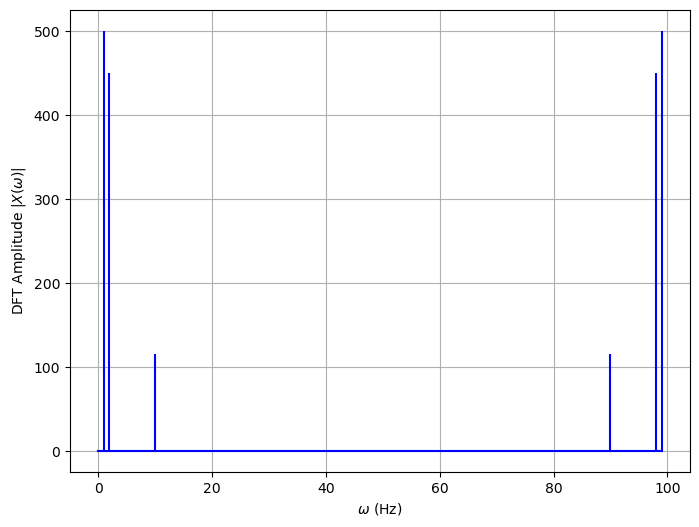

In [61]:
X_k = DFT(x)
N = X_k.size
n = np.arange(N)
T = N / rate
freq = n / T

plt.figure(figsize=(8,6))
plt.stem(freq, abs(X_k), 'b', markerfmt=' ', basefmt='-b')
plt.xlabel(r'$\omega$ '+'(Hz)')
plt.ylabel('DFT Amplitude '+r'$|X(\omega)|$')
plt.grid(True)

## Trigonometrische Interpolation

Man betrachtet das Intervall $[0,2\pi]$ mit äquidistanter Unterteilung

$x_l = \frac{2\pi l}{N} ~ 0 \leq l \leq N$

und Daten $(x_l,y_l). Man setzt zuerst die Folge periodisch auf $\mathbb{Z}$ fort

### Theorem Trigonometrische Interpolation

Sei $y \in P_N$ und $z = F_N y$ Falls N gerade ist interpoliert das trigonometrische Polynom

$p_N(x):= \sum_{k=-N/2}^{N/2}z_ke^{ikx}:= \frac{1}{2}(z_{-N/2}e^{iNx/2}+z_{N/2}e^{iNx/2})+ \sum_{|k|<N/2}z_ke^{ikx}$

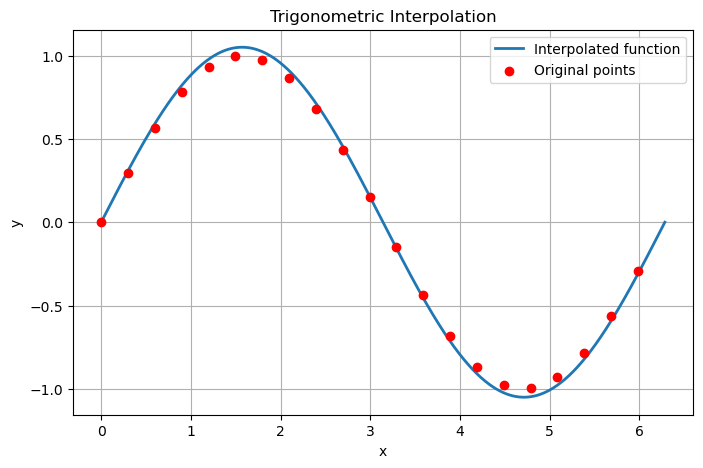

In [113]:

import numpy as np
import matplotlib.pyplot as plt

def trig_interpolation(x_values, y_values, x_interp):
    N = len(x_values) - 1  
    assert N % 2 == 0, "N must be even"
    
    # Compute the z_k Values by applying Fourier Transform to y and normalize
    z_k = np.fft.fft(y_values) / N 
    
    p_N = np.zeros_like(x_interp, dtype=complex)
    
    half_N = N // 2
    
    for k in range(-half_N, half_N + 1):
        p_N += z_k[k] * np.exp(1j * k * x_interp)
    
    return np.real(p_N)

N = 20
x_values = np.linspace(0, 2 * np.pi, N + 1, endpoint=False)  # Equidistant points in [0, 2π)
y_values = np.sin(x_values)


x_interp = np.linspace(0, 2 * np.pi, 1000)

# Perform trigonometric interpolation
y_interp = trig_interpolation(x_values, y_values, x_interp)

# Plot the original points and the interpolated function
plt.figure(figsize=(8, 5))
plt.plot(x_interp, y_interp, label="Interpolated function", lw=2)
plt.scatter(x_values, y_values, color='red', zorder=5, label="Original points")
plt.title("Trigonometric Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



# Chebyshev Polynome

Man definiert die Chebyshef Polynome durch die drei Term Rekursion

$T_0(x)=1 ~ T_1(x) = x ~ T_{n+1}(x)=2xT_n(x)-T_{n-1}(x)$

Folgende Eigenschaften sind gegeben:

+ $T_n$ ist ein Polynom vom Grad $n$ mit Leitkoeffizient $2^{n-1}$
+ Für $x \in [-1,1]$ gilt $T_n(x)\cos(n\arccos(x))$
+ Es gilt $T_n(\cos(\frac{k\pi}{n})) = (-1)^k$
+ Das Chebyshev Polynom $T_n$ besitzt genau $n$ reelle Nullstellen $x_k = \cos(\frac{2k-1}{2n}\pi)$
+ Polynome sind orthogonal bezüglich der Gewichtsfunktion $\omega(x)=\frac{1}{\sqrt{1-x^2}}$



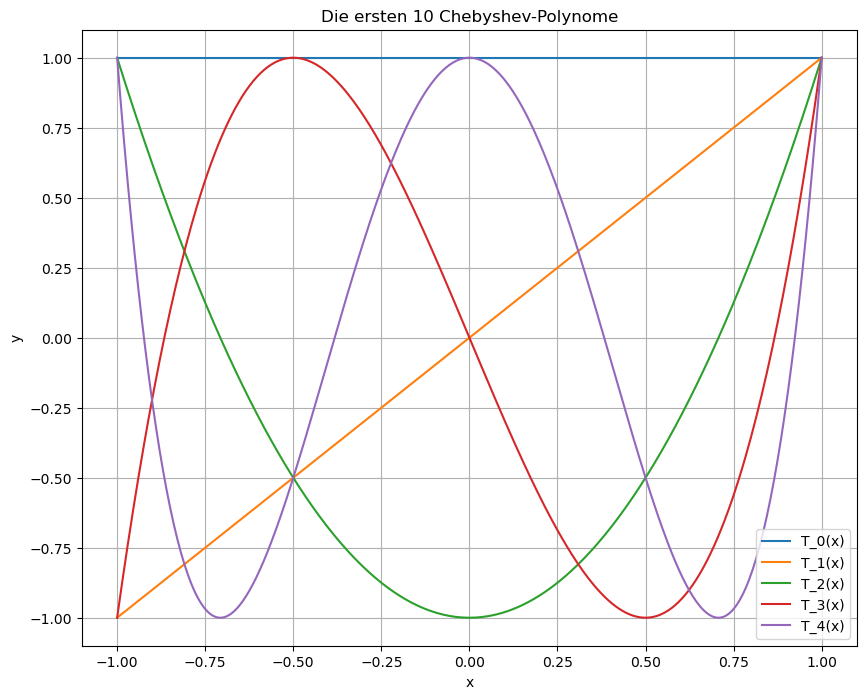

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Erstellen eines Arrays von x-Werten
x = np.linspace(-1.0, 1.0, 400)

# Plotten der ersten 10 Chebyshev-Polynome
plt.figure(figsize=(10, 8))
for n in range(5):
    chebyshev_poly = np.polynomial.Chebyshev.basis(n)
    y = chebyshev_poly(x)
    plt.plot(x, y, label=f'T_{n}(x)')

# Plot-Einstellungen
plt.xlabel('x')
plt.ylabel('y')
plt.title('Die ersten 10 Chebyshev-Polynome')
plt.legend()
plt.grid(True)
plt.show()

## Verfahrensfehler und Chebyshev Polynome

Wichtig ist folgendes Resultat:

Der Verfahrensfehler der Polynominterpolation also $f:[a,b]\to R$ (n+1) mal differenzierbar, und p ein Interpolationspolynom mit $(x_i,f(x_i))$ als Interpolationspunkt dann exestiert $\forall x \in [a,b]$ ein $\epsilon (x) \in (min_i(x_i,x),max_i(x_i,x))$ mit $f(x)-p(x)=(x-x_0)***(x-x_n)\frac{f^{(n+1)}(\epsilon)}{(n+1)!}$


Dieser Fehler besteht aus zwei Teilen, und ist klar abhängig von der Wahl der Stützstellen betrachte also die Chebyshev Polynome

$T_0(x) = 1, T_1(x) = x, T_{n+1} =2xT_n(x) - T_{n-1}(x)$

Die Nullstellen dieser Polynome geben optimale Stützstellen für die Polynominterpolation

### Central Theorem:

Let $x_0 ... x_n$ be roots then

$\max_{a \leq x \leq b} |(x-x_0)(x-x_1)\cdot \cdot \cdot (x-x_n)|$ minimal $\Leftrightarrow x_k = 1/2(a+b) + 1/2(b-a)\cos(\frac{2k+1}{2n+2}\pi)$

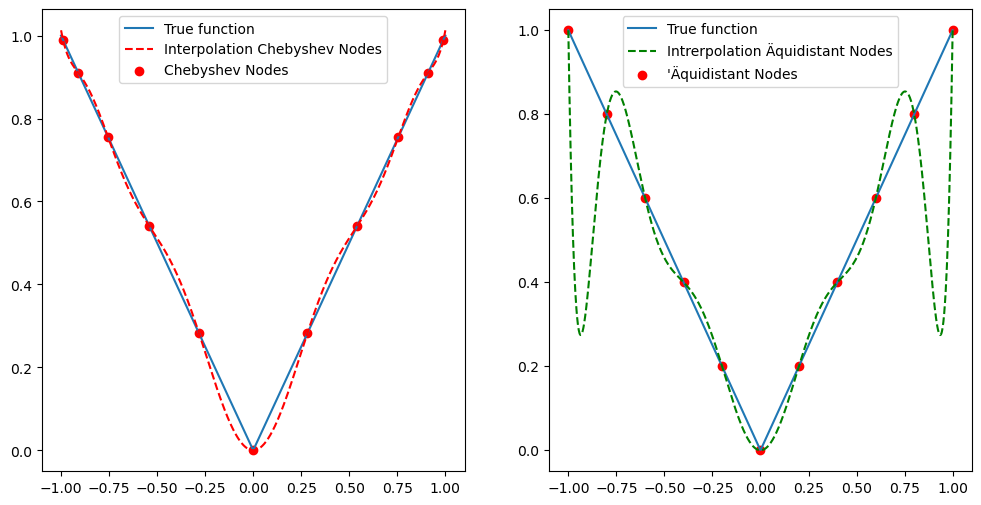

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.abs(x)

def equidistant_nodes(a,b,n):
    return np.linspace(a,b,n+1)

def chebyshev_nodes(a,b,n):
    return 0.5*(a+b) + 0.5*(b-a) * np.cos((2*np.arange(n+1)+1)*np.pi / (2*(n+1)))

def interpolate(x,y,x_eval):
    return np.polynomial.Polynomial.fit(x,y,len(x)-1)(x_eval)


a,b = -1,1

n = 10

x_chebyshev = chebyshev_nodes(a,b,n)
y_chebyshev = f(x_chebyshev)

x_equidistant = equidistant_nodes(a,b,n)
y_equidistant = f(x_equidistant)

x_eval = np.linspace(a,b,1000)
y_true = f(x_eval)

y_interp_chebyshev = interpolate(x_chebyshev, y_chebyshev, x_eval)
y_interp_equidistant = interpolate(x_equidistant,y_equidistant,x_eval)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x_eval,y_true,label ="True function")
plt.plot(x_eval,y_interp_chebyshev, label="Interpolation Chebyshev Nodes", color = "red", linestyle="--")
plt.scatter(x_chebyshev, y_chebyshev, color = "red", label="Chebyshev Nodes")
plt.legend()

plt.subplot(1,2,2)
plt.plot(x_eval,y_true, label="True function")
plt.plot(x_eval,y_interp_equidistant, label = "Intrerpolation Äquidistant Nodes", color ="green", linestyle = "--")
plt.scatter(x_equidistant,y_equidistant, label="'Äquidistant Nodes", color ="red")
plt.legend()

plt.show()

# Condition of the Polynomial Interpolation

Condition = Sensitivity of the result to a pertubation in the input data. 

### Theorem Lagrange Interpolation Formula

THe interpolation formula of the points $(x_i,y_i), i = 0,...n$ has the representation

$p(x) = \sum_{i=0}^{n}y_i l_i(x)$ with $l_i(x) = \Pi_{j=0, j \neq i}^{n} \frac{x-x_j}{x_i-x_j}$


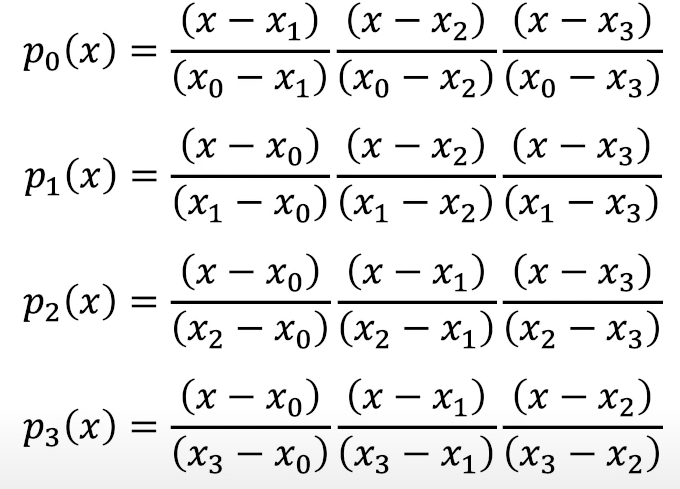

In [91]:
x = [0,20,46,60,86,106]
y = [26.0,48.6,61.6, 71.2, 74.8, 75.2]

m = len(x) # Number of datapoints
n = m-1 # Length of the interpolation polynomial

xp = 60
yp = 0

for i in range(n+1):
    p = 1
    for j in range(n+1):
        if j != i:
            p *= (xp - x[j])/(x[i]-x[j])
    yp += y[i] * p

print("For x = %.2f, y=%f" % (xp,yp))

For x = 60.00, y=71.200000


In [92]:
# lets refine this code using numpy arrays

import numpy as np

x = np.array([0,20,46,60,86,106],float)
y = np.array([26.0,48.6,61.6, 71.2, 74.8, 75.2],float)

xp = 50
yp = 0

for xi,yi in zip(x,y):
    p = np.prod((xp - x[x != xi])/(xi-x[x != xi]))
    yp += yi*p

print((xp,yp))

(50, 64.44516332247412)


# Clenshaw Algorithmus

Gegeben ist die Polynominterpolation mit Chebyshev Stüztstellen 

$x_k = \cos(\frac{2k + 1}{2n +2}\pi)$

Es bilden (nach der diskreten Orthogonalitätrelationen der Chebyshev Polynome) diese Polynome $T_0,T_1...T_n$ eine Basis der Polynome daher gilt

$p(x) = \frac{1}{2}c_0 + c_1T_1(x)  + c_2T_2(x) + ... + c_nT_n(x)$



## Berechnung der Koeffizienten

$c_k = \frac{2}{n+1}\sum_{j=0}^{n}f(\cos(\frac{2j + 1}{2n + 2 }\pi))*\cos(k \frac{(2j + 1)\pi}{2n+2})$

In [93]:
import numpy as np


# Für eine Funktion f [-1,1]

def chebyshev_coefficients(f,n):

    c = np.zeros(n+1)
    for k in range(n+1):
        sum_j = 0
        for j in range(n+1):
            x_j = np.cos((2*j+1)*np.pi / (2*n+2))
            sum_j += f(x_j)*np.cos(k*(2*j+1)*np.pi/(2*n + 2))
        c[k] = (2 / (n+1))*sum_j
    return c

def f(x):
    return np.exp(x)

n = 5

print(chebyshev_coefficients(f,n))

[2.53213176e+00 1.13031821e+00 2.71495339e-01 4.43368388e-02
 5.47404123e-03 5.39727875e-04]


## Theorem 3.47 (Algorithmus von Clenshaw)

Dies gibt uns eine Berechnungsmöglichkeit von $p(x)$ die Koeffizienten habwn wir ja schon.

Gegeben ein Polynom $p(x) = \frac{1}{2}c_0 + c_1T_1(x)+c_2T_2(x) + ... + c_nT_n(x)$

Definiere $d_{n+2} := d_{n+1}:= 0$ und $d_k := c_k + 2xd_{k+1}-d_{k+2}$ für $k = n,n-1,...,0$

Dann gilt $p(x) = \frac{1}{2}(d_0-d_2)$

In [94]:
import numpy as np

def clenshaw_algorithm(x, c):
    """Berechnet das Polynom p(x) mit dem Clenshaw-Algorithmus.
    
    Args:
        x: Der Wert, an dem das Polynom ausgewertet wird.
        c: Die Koeffizienten der Chebyshev-Basis.
    
    Returns:
        Der Wert des Polynoms p(x).
    """
    n = len(c) - 1
    # initialize d
    d = np.zeros(n + 2)
    
    d[-1] = 0
    d[-2] = 0
    # now iterate downwards
    for k in range(n-1, -1, -1):
        d[k] = c[k] + 2*x*d[k+1] - d[k+2]
    return 0.5*(d[0] - d[2])


def f(x):
    return np.exp(x)  # Beispiel: f(x) = e^x

# Grad des Polynoms
n = 5


coefficients = chebyshev_coefficients(f, n)


x = 1

p_x = clenshaw_algorithm(x, coefficients)

print(f"Function Value = {f(x)}")
print(f"clenshaw_algorithm value = {p_x}")
# Still some kind of numerical error but this was also really strange in the Proseminar

Function Value = 2.718281828459045
clenshaw_algorithm value = 2.7176903047359104


# Hermite Interpolation

Folgende Problemstellung wir haben zwei Stüzstellen und wollen ein Polynom vom Grad 3 mit

$p(x_0) = y_0$, $p'(x_0) = y'_0, $p(x_1) = y_1$ und $p'(x_1) = y'_1$

Dazu kann man im Grunde genommmen wieder die dividieren Differenzen verwenden

$p(x) = y_0 + (x-y_0)\delta y_0 + \frac{(x-x_0)(x-x_1)}{h^2}((x-x_0)(y'_1 -\delta y_0)+ (x-x_1)(y'_0 - \delta y_0))$

In [95]:
import numpy as np

def hermite_interpolation(x0, y0, y0_prime, x1, y1, y1_prime, x):
    """
    Berechnet das Hermite-Interpolationspolynom an der Stelle x
    """
    h = x1 - x0
    delta_y0 = (y1 - y0) / h
    
    term1 = y0
    term2 = (x - x0) * y0_prime
    term3 = ((x - x0) * (x - x1)) / h**2 * ((x - x0) * (y1_prime - delta_y0) + (x - x1) * (y0_prime - delta_y0))
    
    return term1 + term2 + term3

x0 = 0
y0 = 1
y0_prime = 0
x1 = 1
y1 = 2
y1_prime = 1

x = 0.5

# Berechnung des Hermite-Interpolationspolynoms an der Stelle x
p_x = hermite_interpolation(x0, y0, y0_prime, x1, y1, y1_prime, x)

print(f"p({x}) = {p_x}")

p(0.5) = 0.875


# Spline Interpolation

Cubic Spline interpolation uses piecewise cubic functions. So the points $(x_i, y_i), (x_{i+1},y_{i+1})$ are joined by a cubic polynomial.

This polynomial has the general form

$S_k(x) := \alpha_k + \beta_k(x-x_k) + \gamma_k (x-x_k)^2 + \delta_k (x-x_k)^3$

In total we have 4n unknowns but need to fullfill the following properties:

+ $s_{k+1}(x_k) = y_k$  (n - Conditions)
+ $s_{k+1}(x_{k+1}) = y_{k+1} = y_{k+1}$ (n - Conditions)
+ $s_k'(x_k) = s'_{k+1}(x_k)$ (n-1 - Conditions)
+ $s_k''(x_k) = s_{k+1}'' (x_k)$ (n-1 - Conditions)

For the two free parameters we now have the following choices:

The spline needs to fullfill $s''(b)(f'(b)-s'(b)) = s''(a)(f'(a)-s'(a))$

+ natural spline $s''(a) = s''(b) = 0$
+ clamped splines $s'(a) = s'(b) = 1
+ periodic splines $f'(a) = f'(b)$ and $s'(a)=s'(b)$ and $s''(a)=s''(b)$

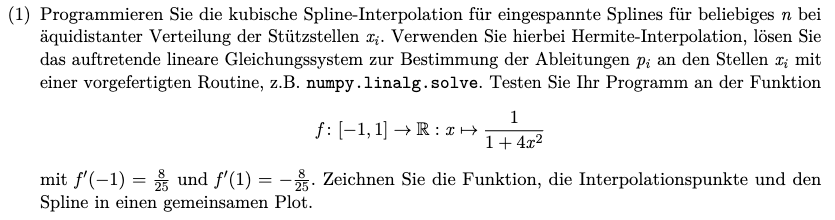

## Construction of the Spline

On the interval $s|_{[x_{i-1},x_i]}$ we need to fullfill the conditions

+ $s_i(x_{i-1}) = y_{i-1}$
+ $s_i(x_i) = y_i$
+ $s'_i(x_{i-1}) = p_{i-1}$
+ $s'_{x_i} = p_i$

And then we use the hermite interpolation

$s_i(x) = y_{i-1} + (x-x_{i-1}) \Delta y_{i-1,i} + \frac{(x-x_{i-1})(x-x_i)}{h^2_{i-1}} \cdot ((p_i - \delta y_{i-1,i})(x-x_{i-1})+(p_{i-1}-\delta y_{i-1,i})(x-x_i))$





### First of implement the divided differences


Remember they are given by 

$\delta y_{ij} = \frac{y_j - y_i}{x_j - x_i}$

$\delta^2y_{ijk} = \frac{\delta y_{jk} - \delta y_{ij}}{x_k - x_i}$

In [96]:
import numpy as np

x = np.array([-3,1,2,4])
y = np.array([-27,1,8,64])


def div_diff(x,y):
    "Top elements are the divided differences"
    n = len(y)
    coef = np.zeros((n,n))
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n - j):
            coef[i,j] = (coef[i+1, j-1] - coef[i, j-1]) / (x[i+j]-x[i])
    return coef

div_diff(x,y)


array([[-27.,   7.,   0.,   1.],
       [  1.,   7.,   7.,   0.],
       [  8.,  28.,   0.,   0.],
       [ 64.,   0.,   0.,   0.]])

In [97]:
def f(x):
    return 1/(1+4*x**2)

f_prime_left = 8/25
f_prime_rihgt = -8/25